In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
with fits.open("ch2_xsm_20210918_v1_level2.lc") as hdul1:
    hdul1.info()
    RATE = hdul1[1].data
RATE

Filename: ch2_xsm_20210918_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   49740R x 4C   [D, E, E, E]   


FITS_rec([(1.48694401e+08, 174.36386, 13.204691, 1.),
          (1.48694402e+08, 179.25542, 13.38863 , 1.),
          (1.48694403e+08, 132.80539, 11.524122, 1.), ...,
          (1.48780797e+08, 419.75967, 20.488037, 1.),
          (1.48780798e+08, 395.45645, 19.886087, 1.),
          (1.48780799e+08, 464.4781 , 21.551754, 1.)],
         dtype=(numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')]))

In [3]:
LC = pd.DataFrame({"TIME" : RATE["TIME"], "RATE" : RATE["RATE"], "ERROR" : RATE["ERROR"], "FRACEXP" : RATE["FRACEXP"]})
LC

,TIME,RATE,ERROR,FRACEXP
0,1.486944e+08,174.363861,13.204691,1.0
1,1.486944e+08,179.255417,13.388630,1.0
2,1.486944e+08,132.805389,11.524122,1.0
3,1.486944e+08,165.179276,12.852209,1.0
4,1.486944e+08,166.161896,12.890380,1.0
...,...,...,...,...
49735,1.487808e+08,437.216888,20.909733,1.0
49736,1.487808e+08,396.128662,19.902981,1.0
49737,1.487808e+08,419.759674,20.488037,1.0
49738,1.487808e+08,395.456451,19.886087,1.0


In [5]:
with fits.open("ch2_xsm_20210918_v1_level2.gti") as hdul2:
    hdul2.info()
    GTI = hdul2[1].data
    

Filename: ch2_xsm_20210918_v1_level2.gti
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  GTI           1 BinTableHDU     53   5R x 2C   [D, D]   


In [6]:
GTI

FITS_rec([(1.48694401e+08, 1.48709213e+08),
          (1.48744460e+08, 1.48751754e+08),
          (1.48752439e+08, 1.48762414e+08),
          (1.48763126e+08, 1.48765705e+08),
          (1.48765706e+08, 1.48780800e+08)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [7]:
print(GTI['START'][0], GTI['STOP'][0])

148694400.52881995 148709213.47873503


In [8]:
LC["TIME"].iloc[0:14797]

0        1.486944e+08
1        1.486944e+08
2        1.486944e+08
3        1.486944e+08
4        1.486944e+08
             ...     
14792    1.487092e+08
14793    1.487092e+08
14794    1.487092e+08
14795    1.487092e+08
14796    1.487092e+08
Name: TIME, Length: 14797, dtype: float64

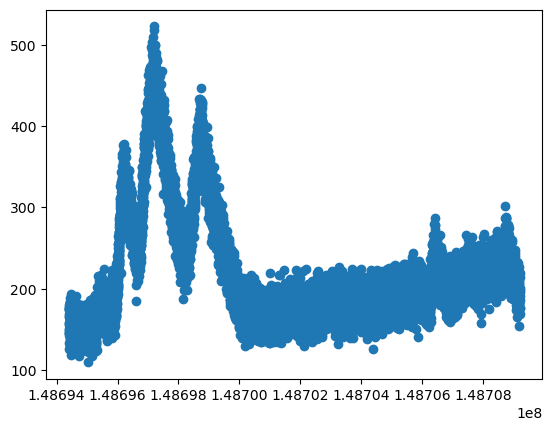

In [9]:
plt.scatter(LC['TIME'].iloc[0:14797], LC['RATE'].iloc[0:14797])

In [20]:
Bin=[]
Mean_rate=[]
for i in range(0,14797,120):
    Bin.append((i,i+120))
    Mean_rate.append((LC["RATE"].iloc[i:i+120]).mean())

In [19]:
x=range(0,1200,120)
x

range(0, 1200, 120)

In [49]:
(Bin)

[(0, 120),
 (120, 240),
 (240, 360),
 (360, 480),
 (480, 600),
 (600, 720),
 (720, 840),
 (840, 960),
 (960, 1080),
 (1080, 1200),
 (1200, 1320),
 (1320, 1440),
 (1440, 1560),
 (1560, 1680),
 (1680, 1800),
 (1800, 1920),
 (1920, 2040),
 (2040, 2160),
 (2160, 2280),
 (2280, 2400),
 (2400, 2520),
 (2520, 2640),
 (2640, 2760),
 (2760, 2880),
 (2880, 3000),
 (3000, 3120),
 (3120, 3240),
 (3240, 3360),
 (3360, 3480),
 (3480, 3600),
 (3600, 3720),
 (3720, 3840),
 (3840, 3960),
 (3960, 4080),
 (4080, 4200),
 (4200, 4320),
 (4320, 4440),
 (4440, 4560),
 (4560, 4680),
 (4680, 4800),
 (4800, 4920),
 (4920, 5040),
 (5040, 5160),
 (5160, 5280),
 (5280, 5400),
 (5400, 5520),
 (5520, 5640),
 (5640, 5760),
 (5760, 5880),
 (5880, 6000),
 (6000, 6120),
 (6120, 6240),
 (6240, 6360),
 (6360, 6480),
 (6480, 6600),
 (6600, 6720),
 (6720, 6840),
 (6840, 6960),
 (6960, 7080),
 (7080, 7200),
 (7200, 7320),
 (7320, 7440),
 (7440, 7560),
 (7560, 7680),
 (7680, 7800),
 (7800, 7920),
 (7920, 8040),
 (8040, 8160),

In [50]:
(Mean_rate)

[155.7552,
 154.09286,
 154.32397,
 152.55534,
 150.0017,
 150.21127,
 152.37764,
 164.14474,
 183.21599,
 176.99232,
 172.14232,
 174.58772,
 184.13506,
 243.74889,
 317.289,
 321.81442,
 297.8998,
 269.8483,
 244.47076,
 270.77005,
 346.97336,
 405.58554,
 442.71875,
 451.4555,
 421.2203,
 392.13873,
 354.80615,
 325.63815,
 300.03226,
 278.89398,
 255.4728,
 243.18295,
 247.30974,
 289.71295,
 337.56393,
 382.18353,
 370.73697,
 345.88992,
 318.8673,
 295.7913,
 281.79364,
 259.3131,
 243.10362,
 225.71681,
 206.89835,
 194.72713,
 184.13211,
 177.95113,
 169.59512,
 170.1568,
 169.31586,
 171.09482,
 169.93471,
 167.3364,
 168.82457,
 169.1568,
 169.17513,
 168.59886,
 171.54082,
 171.10092,
 176.63799,
 173.31638,
 175.63199,
 172.25758,
 173.82524,
 173.48207,
 174.90788,
 176.42415,
 179.90211,
 180.21272,
 181.08363,
 182.73375,
 181.44005,
 183.25392,
 179.21494,
 180.49092,
 181.43164,
 183.46803,
 182.74454,
 184.22113,
 181.25113,
 182.15488,
 181.03358,
 181.59999,
 185.35

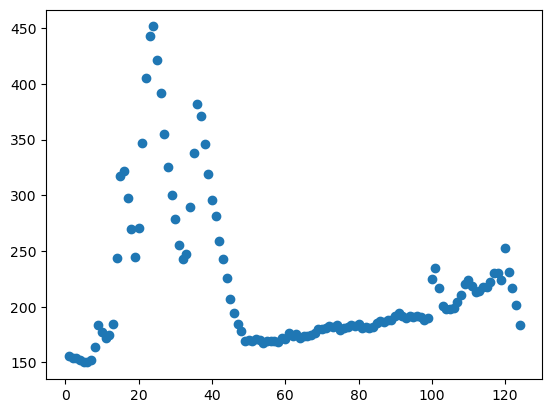

In [28]:
plt.scatter(np.arange(1,125),Mean_rate)

In [52]:
sigma= 0.5
x=np.linspace(-2*sigma,2*sigma,124)
gaussian = (1/((np.sqrt(2*np.pi))*sigma))*(np.exp(-(x/sigma)**2/2))
result = np.convolve(Mean_rate, gaussian, mode="same")

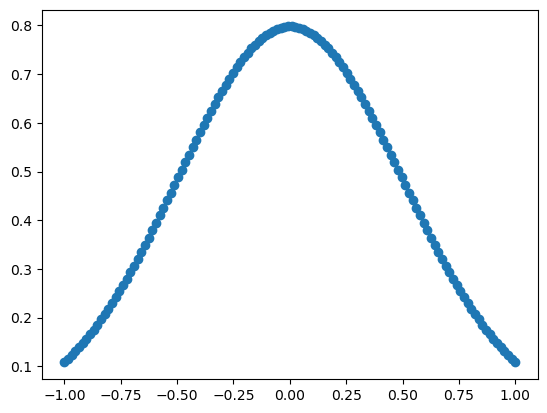

In [53]:
plt.scatter(x,gaussian)

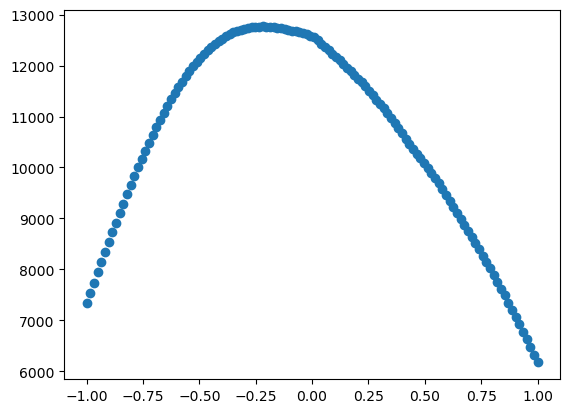

In [54]:
y=np.arange(0,len(Bin)+len(gaussian)-1)
plt.scatter(x,result)

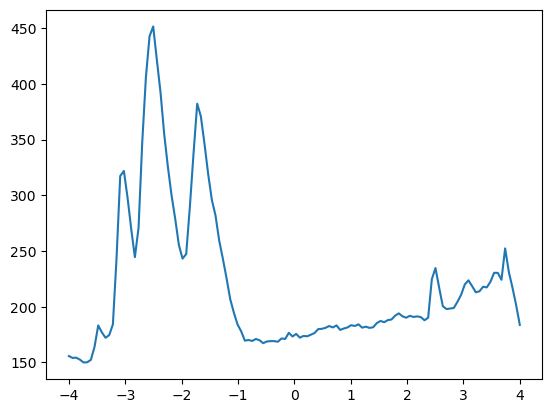

In [43]:
plt.plot(x,Mean_rate)

In [44]:
from scipy.interpolate import make_interp_spline, BSpline

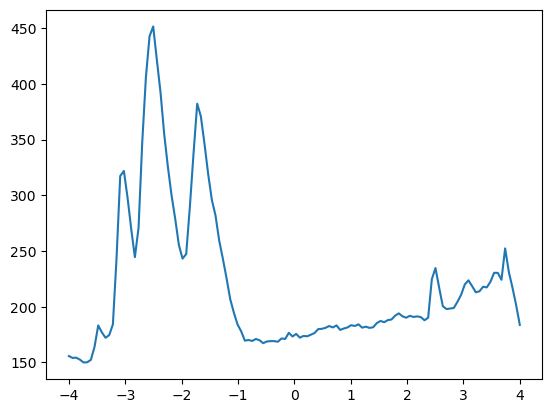

In [51]:
spl = make_interp_spline(x, Mean_rate, k=7)
y_smooth = spl(x)
plt.plot(x, y_smooth)